# DHW

https://coralreefwatch.noaa.gov/product/5km/methodology.php#dhw

In [1]:
import sys
import os
import os.path as op

import xarray as xr
import plotly.express as px
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting import plot_base_map, plot_bar_probs
from ind_setup.plotting_int import plot_timeseries_interactive


In [2]:
path_data = 'sst_daily_1981_2024_palau.nc'

lon_site, lat_site = 134.368203, 7.322074

#Area of interest
lon_range  = [129.4088, 137.0541]
lat_range = [1.5214, 11.6587]

In [3]:
shp_f = op.join(os.getcwd(), '..', '..','..', 'data/Palau_EEZ/pw_eez_pol_april2022.shp')
shp_eez = gpd.read_file(shp_f)

## DHW

In [4]:
'''
Name:
Palau
Polygon Middle Longitude:
134.4250 
Polygon Middle Latitude:
7.6750  
Averaged Maximum Monthly Mean:
29.2309
Averaged Monthly Mean (Jan-Dec):
28.0424 27.7264 27.8581 28.4679 29.1780 29.2309 28.8550 28.7810 28.8377 29.0823 29.1088 28.8078
First Valid DHW Date:
1985 25 03
First Valid BAA Date:
1985 31 03
'''
data_crw = pd.read_csv('https://coralreefwatch.noaa.gov/product/vs/data/palau.txt', sep=r'\s+', skiprows=20)
data_crw.index = pd.to_datetime(data_crw['YYYY'].astype(str) + data_crw['MM'].astype(str)+ data_crw['DD'].astype(str), format = '%Y%m%d')
data_crw = data_crw.groupby(level=0).max()
# data_crw = data_crw[~data_crw.index.duplicated()]
data_crw.sort_index(inplace = True)
# data_crw = data_crw.resample('W').mean()
data_crw = data_crw[:'2024']


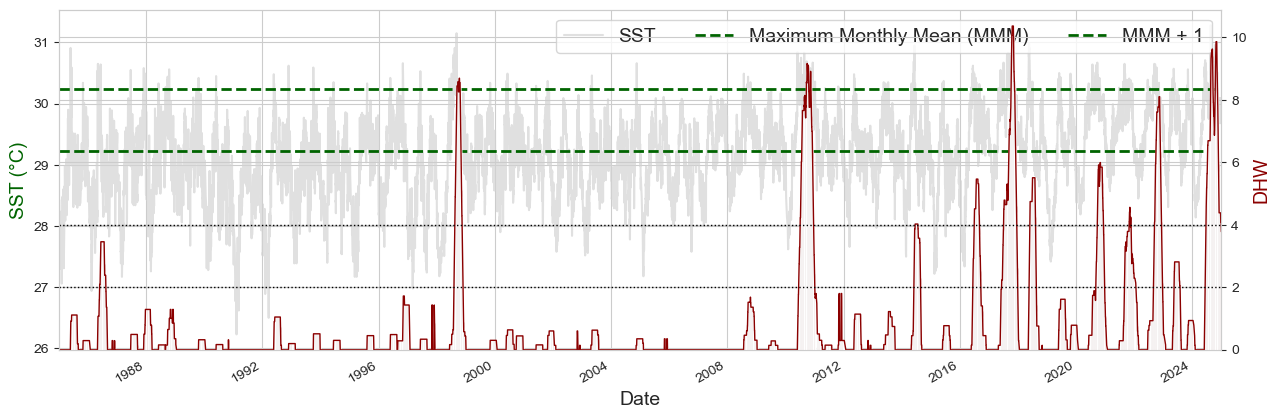

In [5]:
fig, ax = plt.subplots(figsize = (15, 5))
data_crw['SST@90th_HS'].plot(ax = ax, color = 'lightgrey', alpha =.7, label = 'SST')

ax.hlines(29.2309, data_crw.index[0], data_crw.index[-1], color = 'darkgreen', lw = 2, 
          linestyle = '--', label = 'Maximum Monthly Mean (MMM)')

ax.hlines(29.2309 + 1, data_crw.index[0], data_crw.index[-1], color = 'darkgreen', lw = 2, 
          linestyle = '--', label = 'MMM + 1')

ax.set_ylabel('SST (°C)', fontsize = 14, color = 'darkgreen')
ax.set_xlabel('Date', fontsize = 14)
ax.legend(loc = 1, fontsize = 14, ncols = 3)

ax2 = ax.twinx()
data_crw['DHW_from_90th_HS>1'].plot(ax = ax2, color = 'darkred', lw = 1, label = 'DHW')
ax2.bar(x = data_crw.index, height = data_crw['DHW_from_90th_HS>1'].values, color = 'darkred', alpha = 0.5)
ax2.set_ylabel('DHW', fontsize = 14, color = 'darkred')
ax2.set_xlim(data_crw.index[0], data_crw.index[-1])

ax2.hlines([2, 4], data_crw.index[0], data_crw.index[-1], color = 'k', lw = 1, 
          linestyle = ':', label = 'DHW thresholds: 2 and 4')


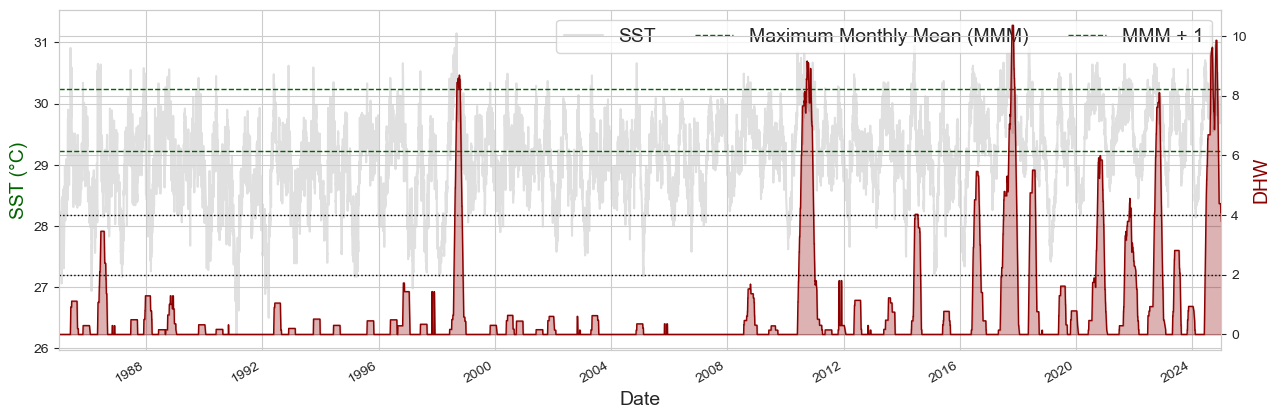

In [6]:
fig, ax = plt.subplots(figsize = (15, 5))
data_crw['SST@90th_HS'].plot(ax = ax, color = 'lightgrey', alpha =.7, label = 'SST')

ax.hlines(29.2309, data_crw.index[0], data_crw.index[-1], color = 'darkgreen', lw = 1, 
          linestyle = '--', label = 'Maximum Monthly Mean (MMM)')

ax.hlines(29.2309 + 1, data_crw.index[0], data_crw.index[-1], color = 'darkgreen', lw = 1, 
          linestyle = '--', label = 'MMM + 1')

ax.set_ylabel('SST (°C)', fontsize = 14, color = 'darkgreen')
ax.set_xlabel('Date', fontsize = 14)
ax.legend(loc = 1, fontsize = 14, ncols = 3)

ax2 = ax.twinx()
data_crw['DHW_from_90th_HS>1'].plot(ax = ax2, color = 'darkred', lw = 1, label = 'DHW')

ax2.fill_between(data_crw.index, data_crw['DHW_from_90th_HS>1'], 0, color = 'darkred', alpha = 0.3)

# ax2.bar(x = data_crw.index, height = data_crw['DHW_from_90th_HS>1'].values, color = 'darkred', alpha = 0.5)
ax2.set_ylabel('DHW', fontsize = 14, color = 'darkred')
ax2.set_xlim(data_crw.index[0], data_crw.index[-1])

ax2.hlines([2, 4], data_crw.index[0], data_crw.index[-1], color = 'k', lw = 1, 
          linestyle = ':', label = 'DHW thresholds: 2 and 4')



Stress Level <br>

No Stress HotSpot <= 0 <br>
Bleaching Watch 0 < HotSpot < 1 <br>
Bleaching Warning 1 <= HotSpot and 0 < DHW < 4 <br>
Bleaching Alert Level 1 1 <= HotSpot and 4 <= DHW < 8 <br>
Bleaching Alert Level 2	1 <= HotSpot and 8 <= DHW <br>


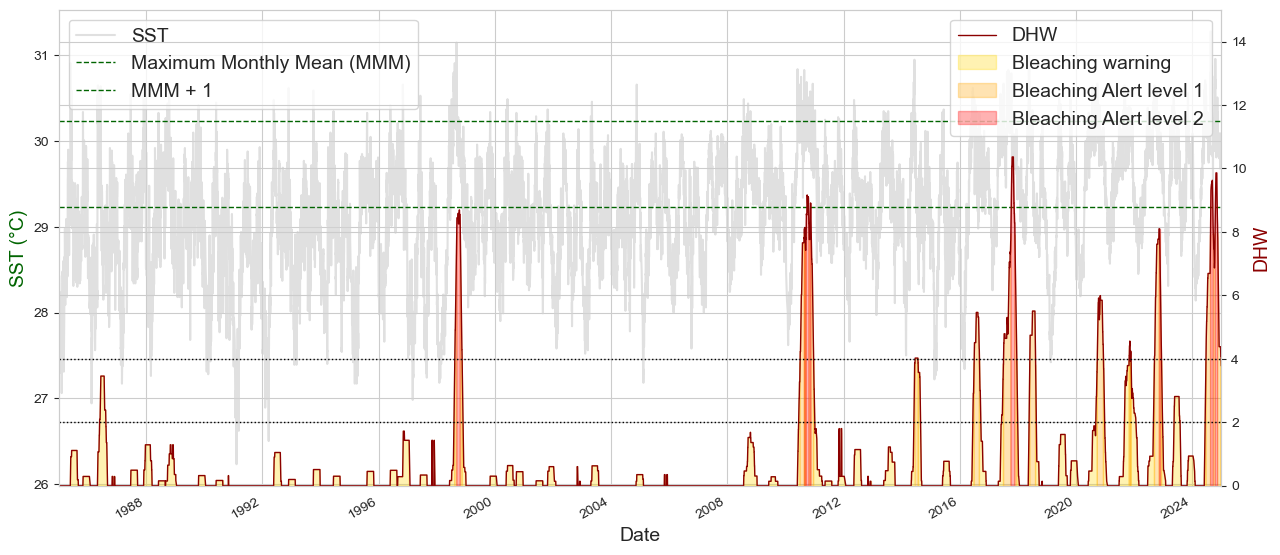

In [7]:
fig, ax = plt.subplots(figsize = (15, 7))
data_crw['SST@90th_HS'].plot(ax = ax, color = 'lightgrey', alpha =.7, label = 'SST')

ax.hlines(29.2309, data_crw.index[0], data_crw.index[-1], color = 'darkgreen', lw = 1, 
          linestyle = '--', label = 'Maximum Monthly Mean (MMM)')

ax.hlines(29.2309 + 1, data_crw.index[0], data_crw.index[-1], color = 'darkgreen', lw = 1, 
          linestyle = '--', label = 'MMM + 1')

ax.set_ylabel('SST (°C)', fontsize = 14, color = 'darkgreen')
ax.set_xlabel('Date', fontsize = 14)
ax.legend(loc = 2, fontsize = 14, ncols = 1)

ax2 = ax.twinx()
data_crw['DHW_from_90th_HS>1'].plot(ax = ax2, color = 'darkred', lw = 1, label = 'DHW')

thrs = [0, 4, 8, 200]
colors = ['gold', 'orange', 'red']
labels = ['Bleaching warning', 'Bleaching Alert level 1', 'Bleaching Alert level 2']
for it, t in enumerate(thrs[:-1]):
    dd = data_crw.copy()[['DHW_from_90th_HS>1']]
    dd['DHW_from_90th_HS>1'] = np.where((dd['DHW_from_90th_HS>1'] > thrs[it]) & (dd['DHW_from_90th_HS>1'] <= thrs[it+1]),
                                        dd['DHW_from_90th_HS>1'], np.nan)
    ax2.fill_between(dd.index,0, dd['DHW_from_90th_HS>1'], color = colors[it], alpha = 0.3, label = labels[it])

ax2.legend(fontsize = 14, loc = 1)
# ax2.bar(x = data_crw.index, height = data_crw['DHW_from_90th_HS>1'].values, color = 'darkred', alpha = 0.5)
ax2.set_ylabel('DHW', fontsize = 14, color = 'darkred')
ax2.set_xlim(data_crw.index[0], data_crw.index[-1])
ax2.set_ylim(0, 15)

ax2.hlines([2, 4], data_crw.index[0], data_crw.index[-1], color = 'k', lw = 1, 
          linestyle = ':', label = 'DHW thresholds: 2 and 4')


## Last 10 years

(np.float64(16071.0), np.float64(19723.0))

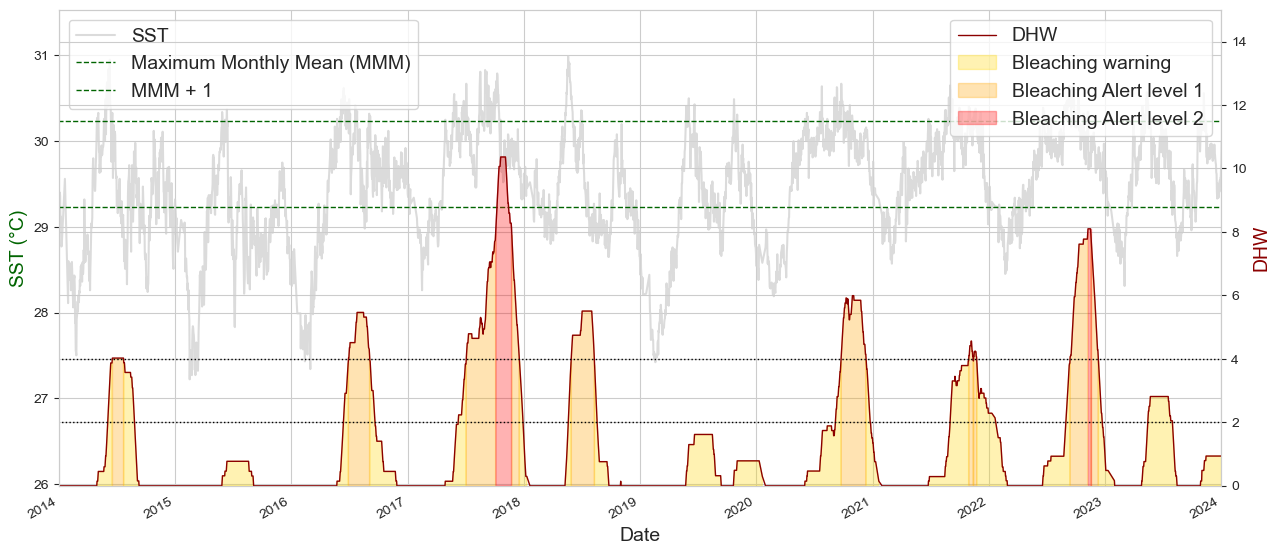

In [8]:
fig, ax = plt.subplots(figsize = (15, 7))
data_crw['SST@90th_HS'].plot(ax = ax, color = 'lightgrey', alpha =.8, label = 'SST')

ax.hlines(29.2309, data_crw.index[0], data_crw.index[-1], color = 'darkgreen', lw = 1, 
          linestyle = '--', label = 'Maximum Monthly Mean (MMM)')

ax.hlines(29.2309 + 1, data_crw.index[0], data_crw.index[-1], color = 'darkgreen', lw = 1, 
          linestyle = '--', label = 'MMM + 1')

ax.set_ylabel('SST (°C)', fontsize = 14, color = 'darkgreen')
ax.set_xlabel('Date', fontsize = 14)
ax.legend(loc = 2, fontsize = 14, ncols = 1)

ax2 = ax.twinx()
data_crw['DHW_from_90th_HS>1'].plot(ax = ax2, color = 'darkred', lw = 1, label = 'DHW')

thrs = [0, 4, 8, 200]
colors = ['gold', 'orange', 'red']
labels = ['Bleaching warning', 'Bleaching Alert level 1', 'Bleaching Alert level 2']
for it, t in enumerate(thrs[:-1]):
    dd = data_crw.copy()[['DHW_from_90th_HS>1']]
    dd['DHW_from_90th_HS>1'] = np.where((dd['DHW_from_90th_HS>1'] > thrs[it]) & (dd['DHW_from_90th_HS>1'] <= thrs[it+1]),
                                        dd['DHW_from_90th_HS>1'], np.nan)
    ax2.fill_between(dd.index,0, dd['DHW_from_90th_HS>1'], color = colors[it], alpha = 0.3, label = labels[it])

ax2.legend(fontsize = 14, loc = 1)
# ax2.bar(x = data_crw.index, height = data_crw['DHW_from_90th_HS>1'].values, color = 'darkred', alpha = 0.5)
ax2.set_ylabel('DHW', fontsize = 14, color = 'darkred')
ax2.set_xlim(data_crw.index[0], data_crw.index[-1])
ax2.set_ylim(0, 15)

ax2.hlines([2, 4], data_crw.index[0], data_crw.index[-1], color = 'k', lw = 1, 
          linestyle = ':', label = 'DHW thresholds: 2 and 4')
ax2.set_xlim('2014', '2024')


## Perpetual Year

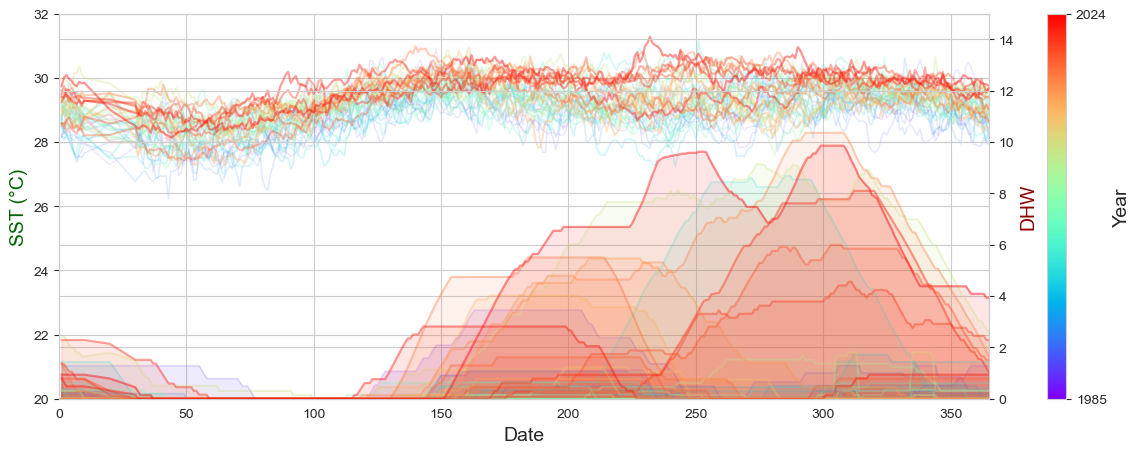

In [9]:
from matplotlib import cm
fig, ax = plt.subplots(figsize = (15, 5))
ax2 = ax.twinx()
colors = cm.rainbow(np.linspace(0, 1, len(range(1985, 2025))))
lw = 1
alpha = 0.1

for iy, y in enumerate(range(1985, 2025)):

    data_plot = data_crw.loc[f'{y}']

    ax.plot(data_plot.index.dayofyear, data_plot['SST@90th_HS'],color = colors[iy], alpha = alpha, label = 'SST', lw = lw)

    ax2.plot(data_plot.index.dayofyear, data_plot['DHW_from_90th_HS>1'],color = colors[iy], alpha = alpha, label = 'SST', lw = lw)
    ax2.fill_between(data_plot.index.dayofyear, 0, data_plot['DHW_from_90th_HS>1'],color = colors[iy], alpha = .1, label = 'SST')

    lw +=.015
    alpha +=.008

ax.set_ylim(20, 32)
ax.set_ylabel('SST (°C)', fontsize = 14, color = 'darkgreen')
ax.set_xlabel('Date', fontsize = 14)
ax2.set_ylabel('DHW', fontsize = 14, color = 'darkred')
ax2.set_xlim(0, 365)
ax2.set_ylim(0, 15)

cbar = plt.colorbar(cm.ScalarMappable(cmap=cm.rainbow), ax = ax)
cbar.set_label('Year', fontsize = 14)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['1985', '2024'])